In [5]:
import os
import csv
import re

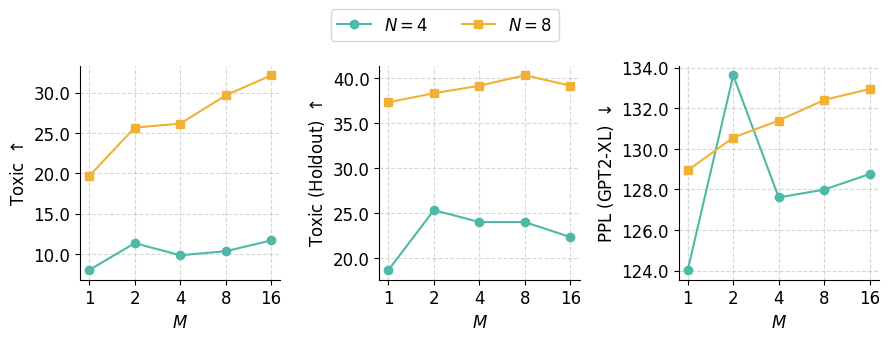

In [71]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, FuncFormatter

colors = ['#4FB9A7', '#F2B134', '#E07024', '#DC3C2D']
markers = ['o', 's', '^', 'D']

metrics = ["toxic", "toxic_ext", "gpt2_ppl"]
metric_labels = [r"Toxic $\uparrow$", r"Toxic (Holdout) $\uparrow$", r"PPL (GPT2-XL) $\downarrow$"]
    
fig, ax = plt.subplots(1, len(metrics), figsize=(3*len(metrics), 3))

def plot(data, save_path=None, title=None):
    plot_data = {}
    for d in data:
        phi = int(d["exp_name"].split("_")[-1])
        for metric in metrics:
            if metric not in plot_data:
                plot_data[metric] = {}
            assert phi not in plot_data[metric]
            plot_data[metric][phi] = float(d[metric]) if "toxic" not in metric else float(d[metric]) * 100
    for i, (metric, metric_label) in enumerate(zip(metrics, metric_labels)):
        sorted_items = sorted(plot_data[metric].items(), key=lambda x: x[0])
        color = colors[0] if title == "N = 4" else colors[1]
        marker = markers[0] if title == "N = 4" else markers[1]
        ax[i].plot([x[0] for x in sorted_items], [x[1] for x in sorted_items], marker=marker, label=fr"${title}$", color=color)
        if title == "N = 8":
            continue
        ax[i].set_xlabel(r"$M$", fontsize=12)
        ax[i].set_ylabel(metric_label, fontsize=12)
        # Disable scientific notation and offset
        ax[i].ticklabel_format(style="plain", axis="y")
        # Force one decimal place
        ax[i].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))
        # set equidistant x-ticks
        ax[i].set_xscale("log")
        ax[i].set_xticks([1,2,4,8,16])
        ax[i].get_xaxis().set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))
        ax[i].minorticks_off() 
        
        ax[i].grid(True, linestyle='--', alpha=0.5)
        # Remove top and right spines for cleaner look
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        
        ax[i].tick_params(axis='x', labelsize=12)  # x-axis
        ax[i].tick_params(axis='y', labelsize=12)  # y-axis
    
        
    # if title is not None:
        # fig.suptitle(title)
    if title == "N = 8":
        # ✅ Create combined legend (take handles/labels from first axis)
        handles, labels = ax[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper center", ncol=len(labels), bbox_to_anchor=(0.5, 1.15), fontsize=12)
        plt.tight_layout()
    # plt.show()

# Read csv file as dict
with open("/vol/bitbucket/cp524/dev/SMC_toxicity/outputs/run_all_20/aggregate_data.csv", "r") as f:
    reader = csv.reader(f, skipinitialspace=True)
    data = list(reader)
    header = data[0]
    data = data[1:]
    data = [dict(zip(header, row)) for row in data]
    
    # filter using regex
    pattern = re.compile(r"reverse_4_0\.1_20_[0-9]+")  # escape dot if it's literal
    plot(
        data=[
            d for d in data
            if pattern.fullmatch(d["exp_name"])
        ],
        title="N = 4"
    )
    pattern = re.compile(r"reverse_8_0\.1_20_[0-9]+")  # escape dot if it's literal
    plot(
        data=[
            d for d in data
            if pattern.fullmatch(d["exp_name"])
        ],
        title="N = 8"
    )
    save_path = os.path.join("plots", "smc_toxicity_phi_ablation.pdf")
    plt.savefig(save_path, dpi=300, bbox_inches="tight", format=save_path.split(".")[-1], pad_inches=0.01)
    plt.show()